# Importamos las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import json
import re
import statistics 
import src.cleaning_func as cf
import sys
sys.path.append("../")
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

# Abrimos el Dataset


In [2]:
mad = pd.read_csv('./data/listings.csv', encoding = 'ISO - 8859-1')
mad.head(15)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,ChamartÃ­n,HispanoamÃ©rica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53
1,21853,Bright and airy room,83531,Abdel,Latina,CÃ¡rmenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.55,2,48
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,2017-07-03,0.03,1,354
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,2019-07-07,0.63,1,301
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,2019-07-10,1.19,1,337
5,30320,Great Vacational Apartments,130907,Dana,Centro,Sol,40.41552,-3.70346,Entire home/apt,65,5,168,2019-07-09,1.50,3,322
6,30959,Beautiful loft in Madrid Center,132883,Angela,Centro,Embajadores,40.41111,-3.70269,Entire home/apt,54,3,8,2017-05-30,0.15,1,0
7,40916,Holiday Apartment Madrid Center,130907,Dana,Centro,Universidad,40.42096,-3.70428,Entire home/apt,90,3,38,2019-07-07,0.35,3,337
8,59923,HabitaciÃ³n para fÃ©minas en el centro de Madrid,288380,Patricia,Centro,Palacio,40.41971,-3.71256,Private room,40,1,14,2018-12-09,0.14,1,363
9,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Arturo,Centro,Justicia,40.42080,-3.69878,Private room,45,1,57,2019-07-29,3.43,2,352


- El dataset tiene 20837 filas y 16 columnas

In [3]:
mad.shape

(20837, 16)

# Limpieza del Dataset

- Muestro las columnas

In [4]:
mad.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

- Elimino las columnas no relevantes

In [5]:
mad = mad.drop(['minimum_nights', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], axis = 1 )

In [6]:
mad.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,ChamartÃ­n,HispanoamÃ©rica,40.45628,-3.67763,Private room,70,65
1,21853,Bright and airy room,83531,Abdel,Latina,CÃ¡rmenes,40.40341,-3.74084,Private room,17,33
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,2
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,64
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,136


- Compruebo los datos nulos y los elimino. No es una cantidad alta y al eliminarlos no pierdo mucha información.

In [7]:
mad.isnull().sum().sort_values(ascending=False)

host_name              15
name                    5
id                      0
host_id                 0
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
number_of_reviews       0
dtype: int64

In [8]:
mad.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,ChamartÃ­n,HispanoamÃ©rica,40.45628,-3.67763,Private room,70,65
1,21853,Bright and airy room,83531,Abdel,Latina,CÃ¡rmenes,40.40341,-3.74084,Private room,17,33
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,2
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,64
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,136
...,...,...,...,...,...,...,...,...,...,...,...
20832,38725567,Acogedor piso de 2 Hab. Hospital La paz 4 Torres,226958922,CristÃ³bal,ChamartÃ­n,Castilla,40.47847,-3.68395,Entire home/apt,100,0
20833,38726351,a 25-minutos del centro de Madrid near Subway,178608863,Rostyslav,Puente de Vallecas,Palomeras Sureste,40.38533,-3.63968,Private room,24,0
20834,38727654,Apartamento Confortable a 300 m de la Gran VÃ­a.,182062359,Jose Maciel,Centro,Universidad,40.42182,-3.70336,Entire home/apt,75,0
20835,38728727,Estudio en pleno LavapiÃ©s,31425029,Valeska,Centro,Embajadores,40.40896,-3.70107,Entire home/apt,45,0


- Muestro si hay duplicados

In [47]:
mad.duplicated().sum()

0

- La nueva database tiene 20837 filas y 11 columnas

In [10]:
mad.shape

(20837, 11)

In [11]:
mad.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,ChamartÃ­n,HispanoamÃ©rica,40.45628,-3.67763,Private room,70,65
1,21853,Bright and airy room,83531,Abdel,Latina,CÃ¡rmenes,40.40341,-3.74084,Private room,17,33
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,2
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,64
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,136


- Modifico el nombre de la columna 'neighbourhood_group'

In [12]:
mad.rename(columns={'neighbourhood_group':'disctrict'},inplace=True)

In [13]:
mad.head()

,id,name,host_id,host_name,disctrict,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,ChamartÃ­n,HispanoamÃ©rica,40.45628,-3.67763,Private room,70,65
1,21853,Bright and airy room,83531,Abdel,Latina,CÃ¡rmenes,40.40341,-3.74084,Private room,17,33
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,2
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,64
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,136


- Me fijo que en la columna 'district' los nombres no están bien, los analizo:

In [14]:
mad['disctrict'].unique()

array(['ChamartÃ\xadn', 'Latina', 'Centro', 'Arganzuela', 'Salamanca',
       'TetuÃ¡n', 'Fuencarral - El Pardo', 'Ciudad Lineal',
       'ChamberÃ\xad', 'Villaverde', 'Hortaleza', 'Moncloa - Aravaca',
       'Carabanchel', 'Retiro', 'San Blas - Canillejas',
       'Villa de Vallecas', 'Barajas', 'Usera', 'Puente de Vallecas',
       'Moratalaz', 'VicÃ¡lvaro'], dtype=object)

In [15]:
mad['disctrict'][0]

'ChamartÃ\xadn'

- Para ello aplico una función y creo una nueva columna con los nombres correctamente escritos.

In [16]:
mad['disctricts'] = mad['disctrict'].apply(cf.carac)
mad.head()

,id,name,host_id,host_name,disctrict,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,disctricts
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,ChamartÃ­n,HispanoamÃ©rica,40.45628,-3.67763,Private room,70,65,Chamartín
1,21853,Bright and airy room,83531,Abdel,Latina,CÃ¡rmenes,40.40341,-3.74084,Private room,17,33,Latina
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,2,Centro
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,64,Centro
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,136,Arganzuela


- Ocurre lo mismo con los nombres de los distritos. Encuentro que los carácteres especiales son; 
'Ã¡','á', 'Ã©','é', 'Ã\xad','í', 'Ã³','ó','Ãº', 'ú'y 'Ã¼','ü'. Aplico la función y creo una nueva columna.

In [17]:
mad['neighbourhoods'] = mad['neighbourhood'].apply(cf.carac)
mad.head()

,id,name,host_id,host_name,disctrict,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,disctricts,neighbourhoods
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,ChamartÃ­n,HispanoamÃ©rica,40.45628,-3.67763,Private room,70,65,Chamartín,Hispanoamérica
1,21853,Bright and airy room,83531,Abdel,Latina,CÃ¡rmenes,40.40341,-3.74084,Private room,17,33,Latina,Cármenes
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,2,Centro,Universidad
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,64,Centro,Justicia
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,136,Arganzuela,Legazpi


- Elimino las columnas y me quedo con las nuevas

In [18]:
mad = mad.drop(['disctrict', 'neighbourhood'], axis = 1 )
mad.head()

,id,name,host_id,host_name,latitude,longitude,room_type,price,number_of_reviews,disctricts,neighbourhoods
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,40.45628,-3.67763,Private room,70,65,Chamartín,Hispanoamérica
1,21853,Bright and airy room,83531,Abdel,40.40341,-3.74084,Private room,17,33,Latina,Cármenes
2,24805,Gran Via Studio Madrid,101471,Iraido,40.42202,-3.70395,Entire home/apt,80,2,Centro,Universidad
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,40.41995,-3.69764,Entire home/apt,115,64,Centro,Justicia
4,26825,Single Room whith private Bathroom,114340,Agustina,40.38985,-3.69011,Private room,25,136,Arganzuela,Legazpi


- Reordeno las columnas

In [19]:
madok = mad[['id','host_id', 'host_name', 'room_type', 'name', 'disctricts', 'neighbourhoods', 'price', 'number_of_reviews', 'latitude', 'longitude']]
madok.head()

,id,host_id,host_name,room_type,name,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude
0,6369,13660,Simon,Private room,"Rooftop terrace room with ensuite bathroom, Airc.",Chamartín,Hispanoamérica,70,65,40.45628,-3.67763
1,21853,83531,Abdel,Private room,Bright and airy room,Latina,Cármenes,17,33,40.40341,-3.74084
2,24805,101471,Iraido,Entire home/apt,Gran Via Studio Madrid,Centro,Universidad,80,2,40.42202,-3.70395
3,24836,101653,Tenty,Entire home/apt,"Select the Madrid more ""cool"".",Centro,Justicia,115,64,40.41995,-3.69764
4,26825,114340,Agustina,Private room,Single Room whith private Bathroom,Arganzuela,Legazpi,25,136,40.38985,-3.69011


- La Dataset limpia contiene 20837 filas y 11 columnas.

In [20]:
madok.shape

(20837, 11)

In [21]:
madok.to_csv("mad_ready", sep=",") 

# Web Scraping

In [22]:
url_mad = "https://www.tripadvisor.es/Attractions-g187514-Activities-c47-Madrid.html"

In [23]:
response = requests.get(url_mad)

In [24]:
response

<Response [200]>

In [25]:
soup = BeautifulSoup(response.content)

In [26]:
response.content[:1000]

b'<!DOCTYPE html><html lang="es"><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><link rel="icon" id="favicon" href="https://static.tacdn.com/favicon.ico?v2" type="image/x-icon" /><link rel="mask-icon" sizes="any" href="https://static.tacdn.com/img2/brand_refresh/application_icons/mask-icon.svg" color="#000000" /><meta name="theme-color" content="#34e0a1" /><meta name="format-detection" content="telephone=no" /><script type="text/javascript">window.taRollupsAreAsync = true;</script><link rel="stylesheet" href="https://static.tacdn.com/css2/webfonts/TripSans/TripSans.css?v1.002" crossorigin><title>10 MEJORES sitios de inter\xc3\xa9s en Madrid</title><meta name="keywords" content="Madrid, Qu\xc3\xa9 hacer en Madrid, atracci\xc3\xb3n, actividad, cosas que hacer, diversi\xc3\xb3n, consejo, atracciones, atracciones en Madrid, actividades en Madrid, cosas que hacer en Madrid, vacaciones, opiniones, viaje"/><meta name="description" content="Sitios de inter\xc3\xa9s e

In [27]:
mad_att = soup.select("h2")

In [28]:
len(mad_att)

30

In [29]:
mad_att

[<h2>Estadio Santiago Bernabéu</h2>,
 <h2>Palacio Real de Madrid</h2>,
 <h2>Gran Vía</h2>,
 <h2>Plaza Mayor</h2>,
 <h2>Templo de Debod</h2>,
 <h2>HorseRiding Madrid</h2>,
 <h2>Iglesia de San Antonio de Los Alemanes</h2>,
 <h2>Museo Cerralbo</h2>,
 <h2>Real Basílica de San Francisco el Grande</h2>,
 <h2>Barrio de Las Letras</h2>,
 <h2>Fundación Mapfre Recoletos</h2>,
 <h2>Monumento a Alfonso XII</h2>,
 <h2>Ermita De San António De La Florida</h2>,
 <h2>Barrio de Salamanca</h2>,
 <h2>Puente de Toledo</h2>,
 <h2>Plaza de Cibeles</h2>,
 <h2>Palacio de Cibeles</h2>,
 <h2>Paseo del Prado</h2>,
 <h2>Edificio Metrópolis</h2>,
 <h2>La Latina</h2>,
 <h2>Plaza de Oriente</h2>,
 <h2>Casa de la Panaderia</h2>,
 <h2>Malasaña</h2>,
 <h2>Puerta de Alcalá</h2>,
 <h2>Cripta de la Almudena</h2>,
 <h2>Museo de la Catedral de la Almudena</h2>,
 <h2>Calle de Alcalá</h2>,
 <h2>Palacio De Cristal</h2>,
 <h2>Fuente de Cibeles</h2>,
 <h2>Casa de Campo</h2>]

In [30]:
mad_att[0].text.strip()

'Estadio Santiago Bernabéu'

In [31]:
att = [(i.text.strip()) for i in mad_att]
att

['Estadio Santiago Bernabéu',
 'Palacio Real de Madrid',
 'Gran Vía',
 'Plaza Mayor',
 'Templo de Debod',
 'HorseRiding Madrid',
 'Iglesia de San Antonio de Los Alemanes',
 'Museo Cerralbo',
 'Real Basílica de San Francisco el Grande',
 'Barrio de Las Letras',
 'Fundación Mapfre Recoletos',
 'Monumento a Alfonso XII',
 'Ermita De San António De La Florida',
 'Barrio de Salamanca',
 'Puente de Toledo',
 'Plaza de Cibeles',
 'Palacio de Cibeles',
 'Paseo del Prado',
 'Edificio Metrópolis',
 'La Latina',
 'Plaza de Oriente',
 'Casa de la Panaderia',
 'Malasaña',
 'Puerta de Alcalá',
 'Cripta de la Almudena',
 'Museo de la Catedral de la Almudena',
 'Calle de Alcalá',
 'Palacio De Cristal',
 'Fuente de Cibeles',
 'Casa de Campo']

In [32]:
att = pd.DataFrame(att, columns=['Atractions'])
att

,Atractions
0,Estadio Santiago Bernabéu
1,Palacio Real de Madrid
2,Gran Vía
3,Plaza Mayor
4,Templo de Debod
5,HorseRiding Madrid
6,Iglesia de San Antonio de Los Alemanes
7,Museo Cerralbo
8,Real Basílica de San Francisco el Grande
9,Barrio de Las Letras


In [33]:
url2 = 'https://www.esmadrid.com/opendata/turismo_v1_es.xml'

In [34]:
response = requests.get(url2)

In [35]:
response

<Response [200]>

In [36]:
soup = BeautifulSoup(response.content)

In [37]:
response.content[:3000]

b'<?xml version="1.0" encoding="UTF-8"?>\n<serviceList><service fechaActualizacion="2021-01-26" id="96187"><basicData><language>es</language><name><![CDATA[Capilla del Hospital de la Venerable Orden Tercera]]></name><email/><phone/><fax/><title><![CDATA[Capilla del Hospital de la Venerable Orden Tercera]]></title><body><![CDATA[<p><strong>Desconocida para muchos madrile\xc3\xb1os, esta preciosa capilla situada dentro del Hospital de la Venerable Orden Tercera (el m\xc3\xa1s antiguo en funcionamiento de Madrid), es una aut\xc3\xa9ntica obra de arte, al igual que el hospital en su totalidad, enmarcado en un edificio hist\xc3\xb3rico &ndash; art\xc3\xadstico que fue construido entre 1679 y 1697 en el solar de las casas del afamado Don Gil Im\xc3\xb3n de la Mota. &nbsp;</strong></p><p>La capilla del hospital, cuya construcci\xc3\xb3n finaliz\xc3\xb3 en torno a 1699, es de planta de cruz latina y una sola nave dividida en tramos, decorada en su interior con entablamiento y cornisa volada. D

In [38]:
att = soup.select("geoData")

In [39]:
att[0]

<geodata><address>de San Bernabé, 13</address><zipcode>28005</zipcode><locality></locality><country>Spain</country><latitude>40.409058100000</latitude><longitude>-3.713925600000</longitude><subadministrativearea>Madrid</subadministrativearea></geodata>

In [40]:
att[0].text.split()


['de', 'San', 'Bernabé,', '1328005Spain40.409058100000-3.713925600000Madrid']

In [44]:
codigos = {
    'Centro': [28004, 28005, 28012, 28013, 28014],
    'Arganzuela': 28005,
    'Retiro': 28032,
    'Salamanca': 28020,
    'Chamartín': 28032,
    'Tetuán': [28020, 28029, 28035, 28039],
    'Chamberí': [28003, 28010, 28015, 28040],
    'Fuencarral-El Pardo': [28034, 28035, 28050,28029,28049,28048,28046],
    'Moncloa-Aravaca': [28008, 28015, 28023, 28035, 28039, 28040],
    'Latina': [28024,28044,28054, 28047,28011,28019],
    'Carabanchel': [28025,28044],
    'Usera': 28026,
    'Puente de Vallecas': [28053, 28018, 28038, 28031],
    'Moratalaz': 28030,
    'Ciudad Lineal': [28033, 28043, 28027, 28017, 28032],
    'Hortaleza': 28004,
    'Villaverde': 28021,
    'Villa de Vallecas': 28031,
    'Vicálvaro': 28028,
    'San Blas-Canillejas': [28022, 28027, 28032, 28037],
    'Barajas': 28042
}

In [45]:
df = pd.DataFrame([[key, codigos[key]] for key in codigos.keys()], columns=['Districts', 'Zipcode'])
df

,Districts,Zipcode
0,Centro,"[28004, 28005, 28012, 28013, 28014]"
1,Arganzuela,28005
2,Retiro,28032
3,Salamanca,28020
4,Chamartín,28032
5,Tetuán,"[28020, 28029, 28035, 28039]"
6,Chamberí,"[28003, 28010, 28015, 28040]"
7,Fuencarral-El Pardo,"[28034, 28035, 28050, 28029, 28049, 28048, 28046]"
8,Moncloa-Aravaca,"[28008, 28015, 28023, 28035, 28039, 28040]"
9,Latina,"[28024, 28044, 28054, 28047, 28011, 28019]"


In [46]:
combine = pd.concat([att, df], axis=1)

TypeError: cannot concatenate object of type '<class 'bs4.element.ResultSet'>'; only Series and DataFrame objs are valid

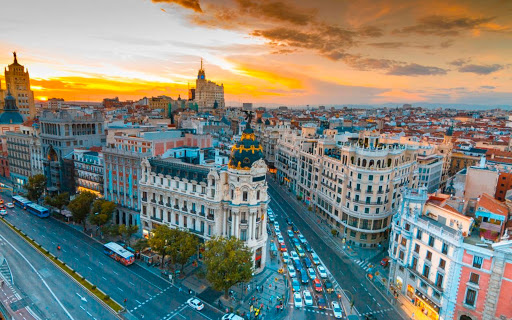